# 결정 트리 분류기 훈련하기

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

model = DecisionTreeClassifier(random_state=0)
model.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [5]:
observation = [[5, 4, 3, 2]]

model.predict(observation)

array([1])

In [6]:
model.predict_proba(observation)

array([[0., 1., 0.]])

In [7]:
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# 결정 트리 회귀 훈련하기

In [10]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

df = pd.read_csv('./datasets/BostonHousing.csv')

X = df.drop(columns='medv').iloc[:, 0:2]
y = df['medv']

model = DecisionTreeRegressor()
model.fit(X, y)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [15]:
observation = [[0.02, 16]]
model.predict(observation)

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([33.])

In [20]:
model = DecisionTreeRegressor(criterion='absolute_error', random_state=0)
model.fit(X, y)

DecisionTreeRegressor(criterion='absolute_error', random_state=0)

In [21]:
model = DecisionTreeRegressor(criterion='friedman_mse', random_state=0)
model.fit(X, y)

DecisionTreeRegressor(criterion='friedman_mse', random_state=0)

# 결정 트리 모델 시각화하기

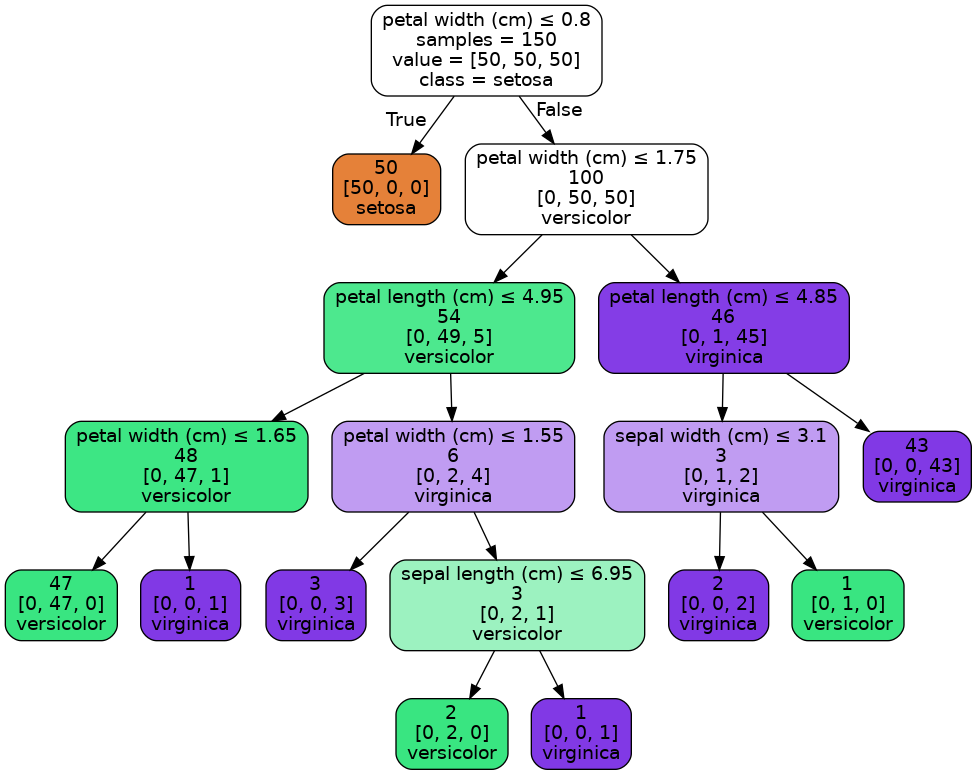

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from dmba import plotDecisionTree

iris = load_iris()
X = iris.data
y = iris.target

model = DecisionTreeClassifier()
model.fit(X, y)

plotDecisionTree(model, feature_names=iris.feature_names, class_names=iris.target_names)

# 랜덤 포레스트 분류기 훈련하기

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

model = RandomForestClassifier(random_state=0, n_jobs=-1)

model.fit(X,y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [29]:
observation = [[5, 4, 3, 2]]

model.predict(observation)

array([1])

In [31]:
model = RandomForestClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

RandomForestClassifier(criterion='entropy', random_state=0)

# 랜덤 포레스트 회귀 훈련하기

In [33]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

df = pd.read_csv('./datasets/BostonHousing.csv')

X = df.drop(columns='medv').iloc[:, 0:2]
y = df['medv']

model = RandomForestRegressor(random_state=0, n_jobs=-1)
model.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=0)

# 랜덤 포레스트에서 중요한 특성 구분하기

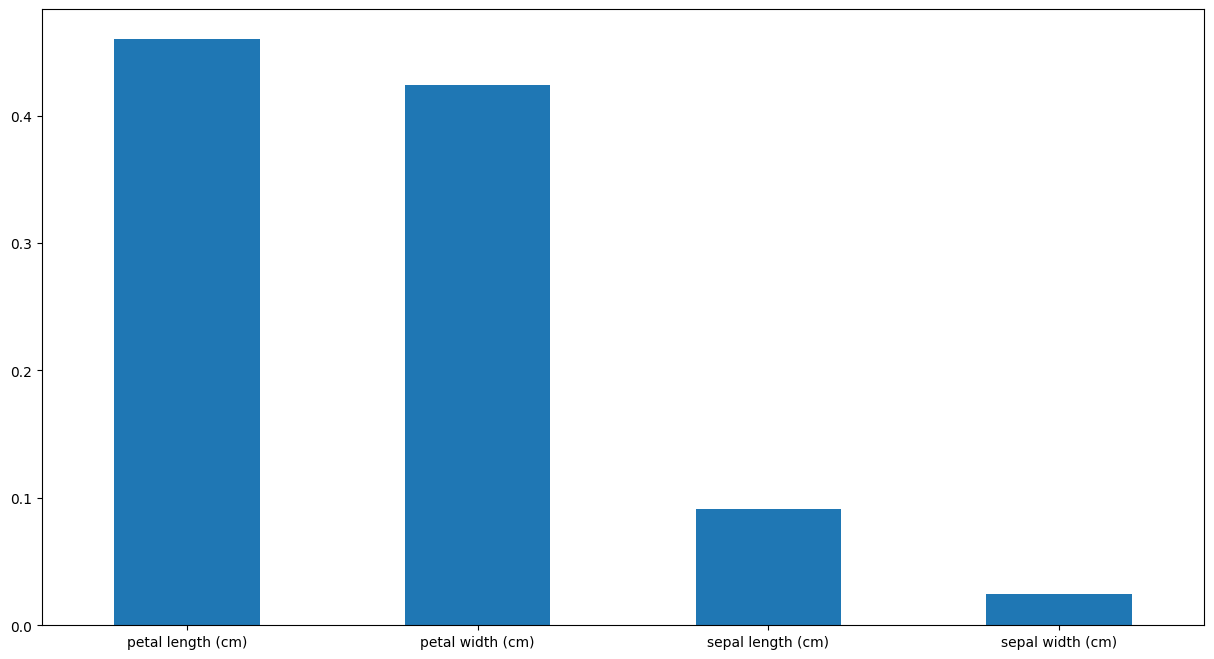

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

model = RandomForestClassifier(random_state=0, n_jobs=-1)

model.fit(X,y)
importances = pd.Series(model.feature_importances_, index=iris.feature_names)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
importances.plot.bar()
plt.xticks(rotation=0)
plt.show()

# 랜덤 포레스트에서 중요한 특성 선택하기

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

model = RandomForestClassifier(random_state=0, n_jobs=-1)

selector = SelectFromModel(model, threshold=0.3)
selector

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                threshold=0.3)

In [52]:
features_important = selector.fit_transform(X, y)
model.fit(features_important, y)

RandomForestClassifier(n_jobs=-1, random_state=0)

# 불균형한 클래스 다루기

In [56]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X = X[40:, :]
y = y[40:]
y = np.where((y == 0), 0, 1)

model = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced')

model.fit(X, y)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)

# 트리 크기 제어하기

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

model = DecisionTreeClassifier(random_state=0,
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              min_weight_fraction_leaf=0,
                              max_leaf_nodes=None,
                              min_impurity_decrease=0)
model.fit(X,y)

DecisionTreeClassifier(min_impurity_decrease=0, min_weight_fraction_leaf=0,
                       random_state=0)

# 부스팅을 사용하여 성능 향상하기

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

model = AdaBoostClassifier(random_state=0)
model.fit(X, y)

AdaBoostClassifier(random_state=0)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

model = GradientBoostingClassifier(random_state=0)
model.fit(X, y)

GradientBoostingClassifier(random_state=0)

# OOB 데이터로 랜덤 포레스트 평가하기

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

model = RandomForestClassifier(random_state=0,
                              n_estimators=1000, oob_score=True, n_jobs=-1)
model.fit(X, y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=0)

In [63]:
model.oob_score_

0.9533333333333334